# Sentiment Analysis Accuracy
7.26.19

Confusion Matrix, Precision, Accuracy

In [70]:
# Import the things

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [72]:
evals = pd.read_csv('eval_reviews.csv')
evals

,Unnamed: 0,reviews,actual_sentiment,predicted_sentiment
0,0,"Great food, and very popular!",True,True
1,1,It's that good.,True,True
2,2,I'm the kind of person where I find one thing ...,True,True
3,3,"Anyway, my colleague and I were the only white...",True,True
4,4,Hands down best Chinese-Korean food in town - ...,True,True
5,5,Solid lunch.,True,True
6,6,They are so friendly and nice.,True,True
7,7,I especially loved added the garnishments.,True,True
8,8,"Server acted like she was on something, and to...",False,True
9,9,They literally make everything fresh right whe...,True,True


In [73]:
evals.dtypes

Unnamed: 0              int64
reviews                object
actual_sentiment         bool
predicted_sentiment      bool
dtype: object

In [74]:
df = evals.reindex(np.random.permutation(evals.index))
df = df[['reviews', 'actual_sentiment', 'predicted_sentiment']]

In [75]:
df.head()

,reviews,actual_sentiment,predicted_sentiment
67,It was pretty slow at 2pm on a Monday so our o...,True,True
90,The better of their two locations also.,True,True
87,Highly recommend if you want authentic Italian...,True,True
84,"The hotel rooms have always been great, large ...",True,True
69,Ok here it goes....If you are looking for amaz...,True,True


In [76]:
df.tail()

,reviews,actual_sentiment,predicted_sentiment
144,Since most of the Chinese places here in the v...,True,True
119,My burger was beyond well done.,True,True
188,The beer from the tap was flat and stale and w...,False,False
131,They are a little pricier than some other plac...,True,True
38,The Empanadas had great flavor.,True,True


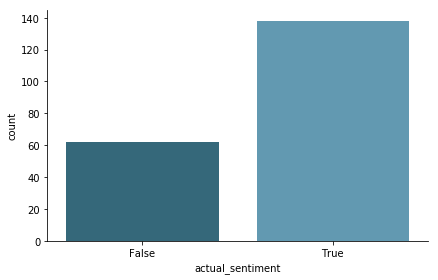

In [77]:
# Plot out the actual sentiment
sb.factorplot(x="actual_sentiment", data=df, kind="count", size=4, aspect=1.5, palette="PuBuGn_d")
plt.show()

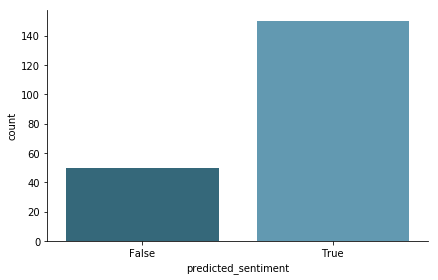

In [78]:
# Plot out the predicted sentiment
sb.factorplot(x="predicted_sentiment", data=df, kind="count", size=4, aspect=1.5, palette="PuBuGn_d")
plt.show()

### Add two new columns of counting 

In [79]:
df['act_count'] = df[['actual_sentiment']].sum(axis=1)

df.head()

,reviews,actual_sentiment,predicted_sentiment,act_count
67,It was pretty slow at 2pm on a Monday so our o...,True,True,1
90,The better of their two locations also.,True,True,1
87,Highly recommend if you want authentic Italian...,True,True,1
84,"The hotel rooms have always been great, large ...",True,True,1
69,Ok here it goes....If you are looking for amaz...,True,True,1


In [80]:
df['pred_count'] = df[['predicted_sentiment']].sum(axis=1)

df.head()

,reviews,actual_sentiment,predicted_sentiment,act_count,pred_count
67,It was pretty slow at 2pm on a Monday so our o...,True,True,1,1
90,The better of their two locations also.,True,True,1,1
87,Highly recommend if you want authentic Italian...,True,True,1,1
84,"The hotel rooms have always been great, large ...",True,True,1,1
69,Ok here it goes....If you are looking for amaz...,True,True,1,1


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['act_count'], df['pred_count'])

array([[ 45,  17],
       [  5, 133]])

In [82]:
y_true, y_pred = df['act_count'].values, df['pred_count'].values

In [83]:
class_names = ['Actual','Pred']

In [84]:
from sklearn.utils.multiclass import unique_labels

In [85]:
np.unique(y_true)

array([0, 1])

Confusion matrix, without normalization
[[ 45  17]
 [  5 133]]
Normalized confusion matrix
[[0.73 0.27]
 [0.04 0.96]]


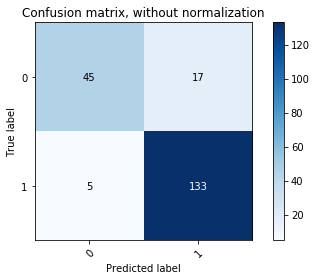

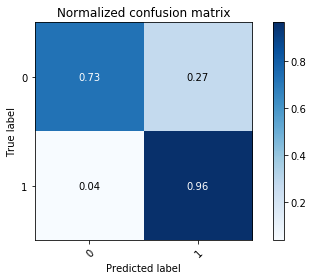

In [86]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes = np.unique(y_true+y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


In [88]:
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)

print("Precision: {}\nRecall: {}".format(precision, recall))

Precision: 0.8866666666666667
Recall: 0.9637681159420289
